In [1]:
import keras
keras.__version__

'2.8.0'

In [23]:
from keras.datasets import imdb
(train_data, train_label),(test_data, test_label)=imdb.load_data(num_words=10000)
#10000개의 데이터로 제약해서 가져오겠다

In [24]:
len(train_data)
#학습용 데이터의 개수

25000

In [25]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [26]:
train_label[0]

1

In [27]:
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다
word_index = imdb.get_word_index()
# 정수 인덱스와 단어를 매핑하도록 뒤집습니다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 리뷰를 디코딩합니다. 
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [28]:
import numpy as np

In [29]:
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    #단어의 수만큼 세로줄, 가로줄은 10000개
    
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

In [30]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [31]:
y_train=np.asarray(train_label).astype('float32')
y_test=np.asarray(test_label).astype('float32')

In [32]:
from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#처음에만 입력값을 넣어준다
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,  activation='sigmoid'))
#맨 끝에 분별력을 위해 가파른 시그모이드를 쓴다
#시그모이드를 썼다는 것은 0,1 둘 중 하나
#softmax는 0,1,2,3.. 여러 개 중의 하나
#시그모이드&소프트맥스는 분류 문제
#분류 문제이기 때문에 loss에 crossentropy 사용
#소프트맥스를 썼다면 categorical_entropy

In [33]:
from keras import losses
from keras import metrics
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

C:\Users\hyerin\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [34]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
#10000개 이후의 나머지 부분

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [35]:
history=model.fit(partial_x_train, 
          partial_y_train,
          epochs=3,
          batch_size=512,
          validation_data=(x_val,y_val))
#x,y의 값 주기
#15000건으로 학습을 하게 됨
#epochs=학습 반복 횟수
#검증작업 실행

Epoch 1/3
30/30 [==============================] - 5s 105ms/step - loss: 0.5103 - binary_accuracy: 0.7842 - val_loss: 0.3838 - val_binary_accuracy: 0.8726
Epoch 2/3
30/30 [==============================] - 1s 30ms/step - loss: 0.3080 - binary_accuracy: 0.9023 - val_loss: 0.3152 - val_binary_accuracy: 0.8818
Epoch 3/3
30/30 [==============================] - 1s 22ms/step - loss: 0.2263 - binary_accuracy: 0.9270 - val_loss: 0.2811 - val_binary_accuracy: 0.8891


In [36]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [37]:
import matplotlib.pyplot as plt

In [38]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

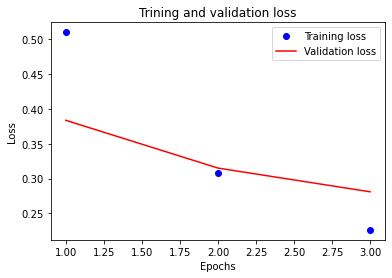

In [39]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Trining and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

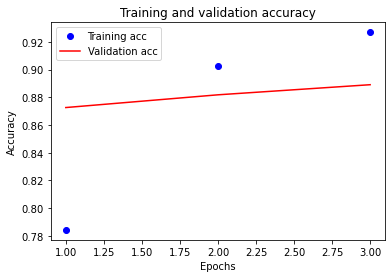

In [40]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [43]:
results=model.evaluate(x_test,y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.2986 - binary_accuracy: 0.8826


In [44]:
results

[0.29857227206230164, 0.8826000094413757]

In [45]:
model.predict(x_test)

array([[0.27363342],
       [0.9920764 ],
       [0.6910882 ],
       ...,
       [0.12195984],
       [0.22472739],
       [0.599218  ]], dtype=float32)